<div style="font-family:Arial Black;color:black"><h1>Social Network Advertisement Analysis Using Decision Tree</h1></div>
<hr>
<hr>

<b>Assignment 15</b> | <a href=https://www.guvi.in/referral/l/g62xr title='GUVI'><b>Guvi Data Science Bootcamp</b></a>

<p>
The assignment contains social network advertisement dataset i.e. user ID, their gender, estimated salary and whether they have purchased a product or not.
</p>

##### Problem Statement: <br>
<p>

- To perform exploratory data analysis to find out targeted user group for online ads. <br>

- To build a decision tree model to predict whether a new customer will purchase a product or not and find out important features.
</p>


<a id='contents'><a>

<div style="font-family:Arial Black; color:black"><h2>Contents</h2></div>

- [Import libraries and dataset](#import)

- [Exploratory data analysis](#eda)

- [Statistical and analytical insights](#insights)

- [Data pre-processing](#data-preparation)

- [Decision tree classifier](#dt_classifier)

- [Cross validation](#cross_validation)

- [Final Model](#final_model)

- [Conclusion](#conclusion)

<a id='import'></a>

***
## Import Libraries and Dataset
***

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import janitor
import klib
from matplotlib import pyplot as plt
from sklearn import preprocessing, model_selection, tree, metrics

%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 14

#### Importing the dataset

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
df = janitor.clean_names(data)
df.head(10)

,user_id,gender,age,estimatedsalary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


<a id='eda'><a>

***
## Exploratory Data Analysis
***

In [3]:
# Shape
df.shape

(400, 5)

In [4]:
# Check information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          400 non-null    int64 
 1   gender           400 non-null    object
 2   age              400 non-null    int64 
 3   estimatedsalary  400 non-null    int64 
 4   purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
# Check duplicate
df.duplicated().any()

False

In [6]:
# Check for missing values
df.isna().sum()

user_id            0
gender             0
age                0
estimatedsalary    0
purchased          0
dtype: int64

In [7]:
# Remove user_id attribute as that not important for analysis
df = janitor.remove_columns(df, ['user_id'])

<a id='description_table'></a>

In [8]:
# Description of the data
df.describe()

,age,estimatedsalary,purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<a id='correlation_matrix'></a>

**Correlation Matrix**

In [9]:
# Correlation matrix
klib.corr_mat(df)

,age,estimatedsalary,purchased
age,1.00,0.16,0.62
estimatedsalary,0.16,1.00,0.36
purchased,0.62,0.36,1.00


**Gender**

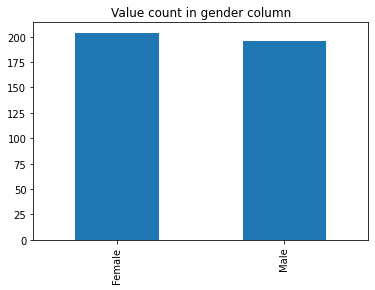

In [10]:
df.gender.value_counts().plot(kind='bar')
plt.title("Value count in gender column")
plt.show()

In [11]:
df.gender.value_counts()

Female    204
Male      196
Name: gender, dtype: int64

**Age**

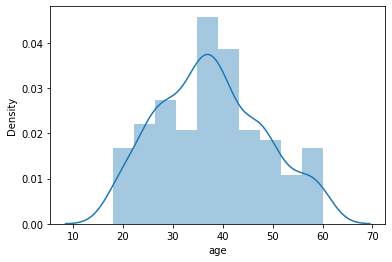

In [12]:
sns.distplot(df.age);

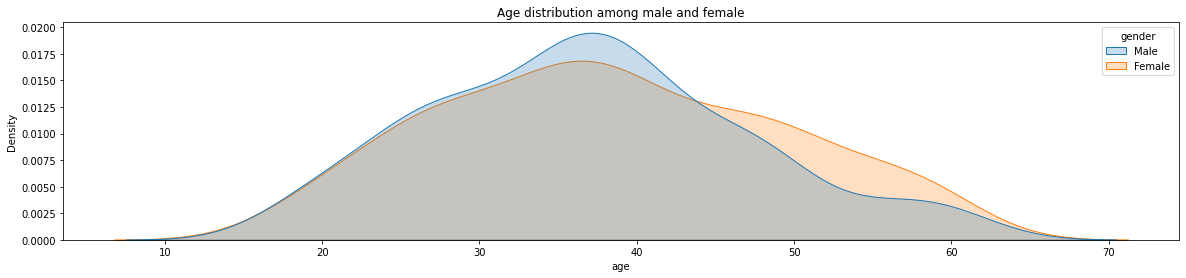

In [13]:
# Age distribution among gender
fig = plt.figure(figsize=(20,4))
sns.kdeplot(data=df, x='age', hue='gender', fill=True)
plt.title("Age distribution among male and female")
plt.show()

In [14]:
print("Median age of male users: {:.2f}".format(df[df['gender']=='Male'].age.median()))
print("Median age of female users: {:.2f}".format(df[df['gender']=="Female"].age.median()))

Median age of male users: 36.50
Median age of female users: 37.50


**Estimated Salary**

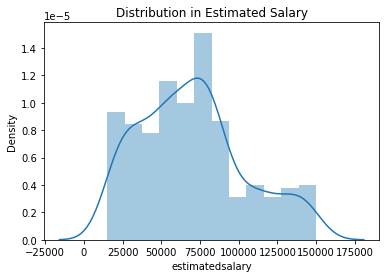

In [15]:
sns.distplot(df.estimatedsalary)
plt.title("Distribution in Estimated Salary")
plt.show()

In [16]:
# Avg salary
print("Average estimated salary of male users: {}".format(round(df[df.gender=='Male'].estimatedsalary.mean())))
print("Average estimated salary of female users: {}".format(round(df[df.gender=='Female'].estimatedsalary.mean())))

Average estimated salary of male users: 67643
Average estimated salary of female users: 71760


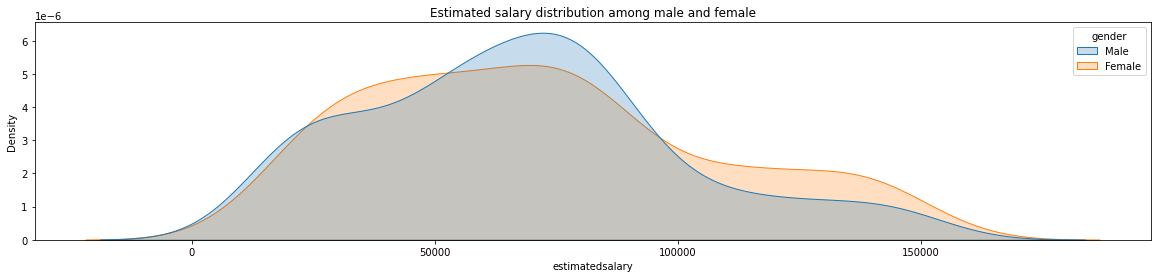

In [17]:
# Salary distribution in male and female
fig = plt.figure(figsize=(20,4))
sns.kdeplot(data=df, x='estimatedsalary', hue='gender', fill=True)
plt.title("Estimated salary distribution among male and female")
plt.show()

In [18]:
most_salary = df[df['estimatedsalary']>70000] # users with more than 70K (median estimated salary)
most_salary.shape[0] 

197

In [19]:
# Number of users with less than median salary
df.shape[0]-most_salary.shape[0] 

203

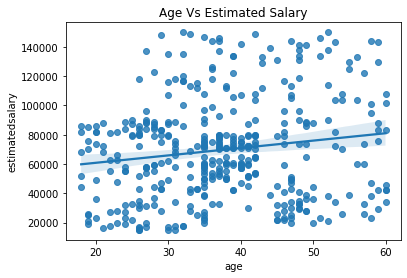

In [20]:
# Relation between age and estimated salary
sns.regplot(x='age',y='estimatedsalary',data=df, )
plt.title("Age Vs Estimated Salary")
plt.show()

**Purchased**

In [21]:
df.purchased.value_counts()

0    257
1    143
Name: purchased, dtype: int64

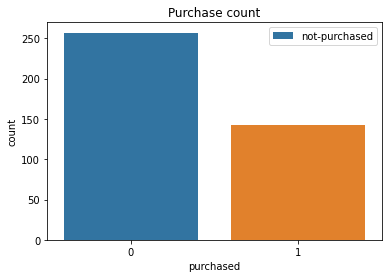

In [22]:
ax= sns.countplot(x='purchased', data=df)
plt.legend([0,1],labels=['not-purchased','purchased'])
plt.title("Purchase count")
plt.show()

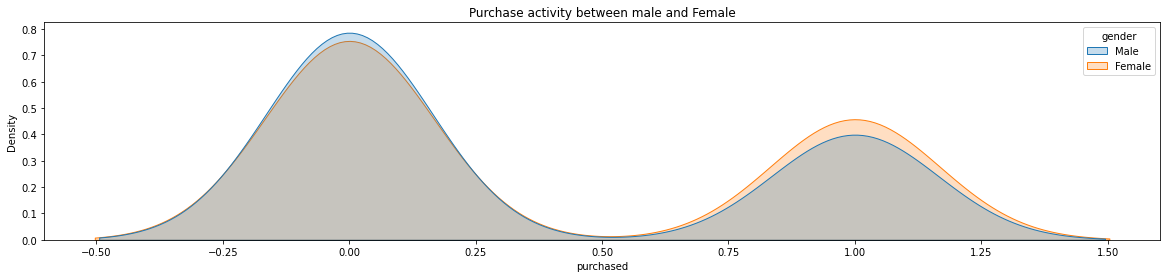

In [23]:
fig = plt.figure(figsize=(20,4))
sns.kdeplot(data=df, x='purchased', hue='gender', fill=True)
plt.title("Purchase activity between male and Female")
plt.show()

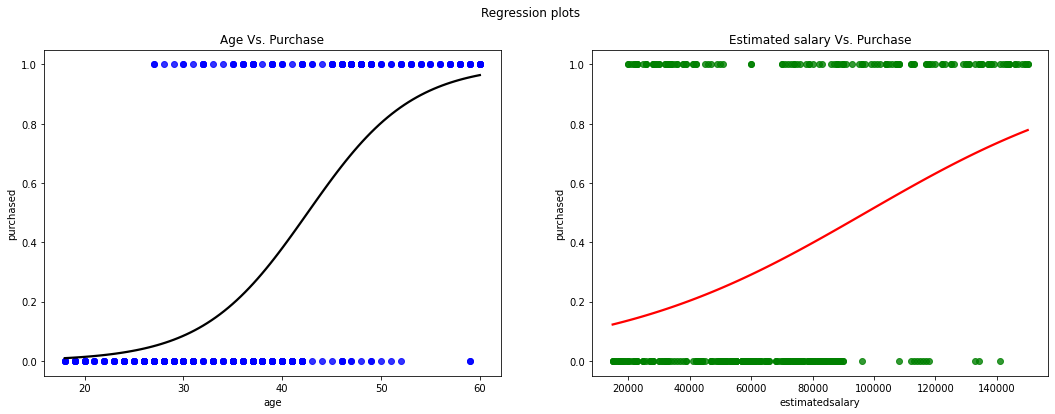

In [24]:
fig,axes=plt.subplots(1,2, figsize=(18,6))
fig.suptitle("Regression plots")
sns.regplot(
    ax=axes[0], 
    data=df, 
    x='age', 
    y='purchased', 
    logistic=True, 
    ci=False, 
    scatter_kws=dict(color='blue'),
    line_kws=dict(color='black')
)

sns.regplot(
    ax=axes[1],
    data=df,
    x='estimatedsalary',
    y='purchased',
    logistic=True,
    ci=False,
    scatter_kws=dict(color='green'),
    line_kws=dict(color='red')
)

axes[0].set_title("Age Vs. Purchase")
axes[1].set_title("Estimated salary Vs. Purchase")
plt.show()

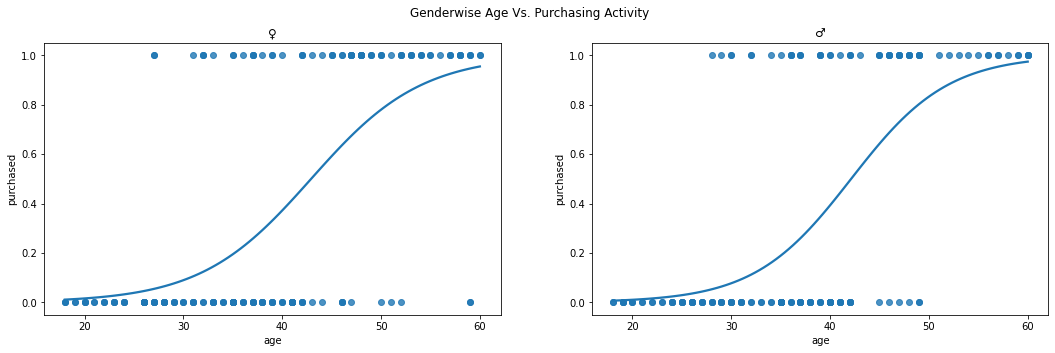

In [25]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
fig.suptitle("Genderwise Age Vs. Purchasing Activity")

sns.regplot(ax=axes[0], x='age', y='purchased', data=df[df.gender=='Female'], logistic=True, ci=False)
axes[0].set_title("♀️")

sns.regplot(ax=axes[1], x='age', y='purchased', data=df[df.gender=='Male'], logistic=True, ci=False)
axes[1].set_title('♂️')
plt.show()

In [26]:
# Purchasing activity of females
female_purchasing_activity = df[(df.gender=='Female') & (df.purchased==1)]

# Purchasing activity of Male
male_purchasing_activity = df[(df.gender=='Male') & (df.purchased==1)]

<a id='distribution_plots'></a>

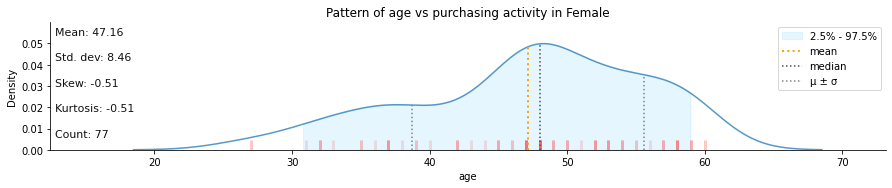

In [27]:
klib.dist_plot(female_purchasing_activity.age)
plt.title("Pattern of age vs purchasing activity in Female")
plt.show()

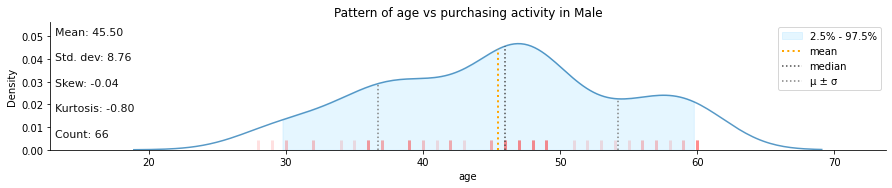

In [28]:
klib.dist_plot(male_purchasing_activity.age)
plt.title("Pattern of age vs purchasing activity in Male")
plt.show()

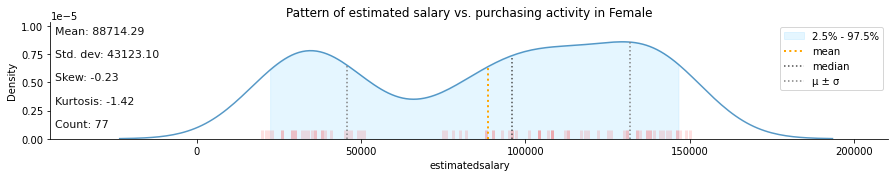

In [29]:
klib.dist_plot(female_purchasing_activity.estimatedsalary)
plt.title("Pattern of estimated salary vs. purchasing activity in Female")
plt.show()

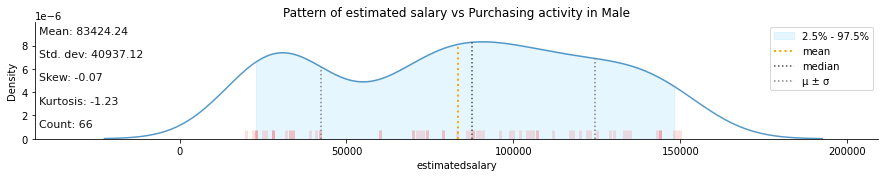

In [30]:
klib.dist_plot(male_purchasing_activity.estimatedsalary)
plt.title("Pattern of estimated salary vs Purchasing activity in Male")
plt.show()

<a id='insights'></a>

***
## Statistical and Analytical Insights from the Data:
***
- The dataset contains 400 unique data of user age, estimated salary and their purchase record.

- The users are of age group in between 18 to 60. 

- The median age is 37; which implies more younger (age group less than 40) users are listed than older age group (more than 40).

- There are more female users than male. Out of 400 users, 204 are female and 196 are male; out of which only 143 has purchasing activity.

- Distinctly, there are more young male users and elder female users than their respective counter parts.

- Age happened to have high correlation ([correlation matrix](#correlation_matrix)) with purchase than estimated salary. 
> This means:<br> 
> 1. Either older people are getting less salary or they have less purchasing activity.
> 2. Or younger people are having more purchasing activity.

- Age and estimated salary has a very less positive correlation. The [description table](#description_table) shows that q3 is 88k where maximum estimated salary is 1.5 lakhs. This evidently shows that only few users salary has increased with age. Which is true in real world as salary is highly proportional to profession than age.

- Users of age $\approx{45}$ have most purchasing activity.

- Users purchasing activity starts after 30. In case of female its after $\approx{32}$ and in case of male its after $\approx{27}$.

- Elderly females and younger males are having most purchasing activity. (check [distribution plots](#distribution_plots)) This implies that older males are less interested in online purchasing. This may be happening due to lower estimated salary of elder males than elder females.

- In this data set `Age` is the determinant feature. We will check this assumption with our decision tree model.
 
- Users that can serve as target(potentially) for customized ads:<br> 
>> <b>Male Users</b>: users with age above 40 and estimated salary above 50k <br>
>> <b>Female Users</b>: Users with age above 45 and estimated salary above 70K


<a id="data_preparation"></a>

***
## Data Preparation and Pre-processing
***

##### Encoding Categorical data

In [31]:
df['gender'] = df.gender.map({'Female':1, 'Male':0})

In [32]:
df.gender.value_counts()

1    204
0    196
Name: gender, dtype: int64

In [33]:
df.head()

,gender,age,estimatedsalary,purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [34]:
df.columns

Index(['gender', 'age', 'estimatedsalary', 'purchased'], dtype='object')

In [35]:

# shuffle data
shuffled_data = df.reindex(np.random.permutation(df.index))

# Differentiate target from features
X,y = shuffled_data[['gender','age','estimatedsalary']], shuffled_data['purchased']

# split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, random_state=27, test_size=0.2)

# shape
X_train.shape, X_test.shape

((320, 3), (80, 3))

In [36]:
# Save the train dataset with best test and train score
X_train.to_csv('Online_ads_training_set.csv')

**Feature Scaling**

In [37]:
scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<a id='dt_classifier'></a>

***
## Decision Tree Classifier
***

**Fitting Decision Tree Classification to the Training set**

In [38]:
dt = tree.DecisionTreeClassifier().fit(X_train, y_train)

**Predicting the Test set results**

In [39]:

y_pred = dt.predict(X_test)

In [40]:
prediction_df = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred
})


prediction_df.head()

,actual,predicted
392,1,0
257,0,0
122,0,1
397,1,1
204,1,1


**Making the Confusion Matrix**

In [41]:
cf_metrics = metrics.confusion_matrix(y_test, y_pred)
cf_metrics

array([[42, 12],
       [ 5, 21]])

In [42]:
cf_metrics.flatten()

array([42, 12,  5, 21])

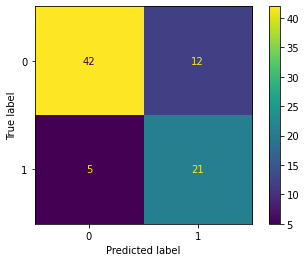

In [43]:
metrics.plot_confusion_matrix(dt, X_test, y_test);

**Visualising the Training set results**

In [44]:
dt.score(X_train, y_train)

1.0

**Visualising the Test set results**

In [45]:
dt.score(X_test, y_test)

0.7875

The model is over-fitting.

Let's find the max depth with cross-validation and train the model again.

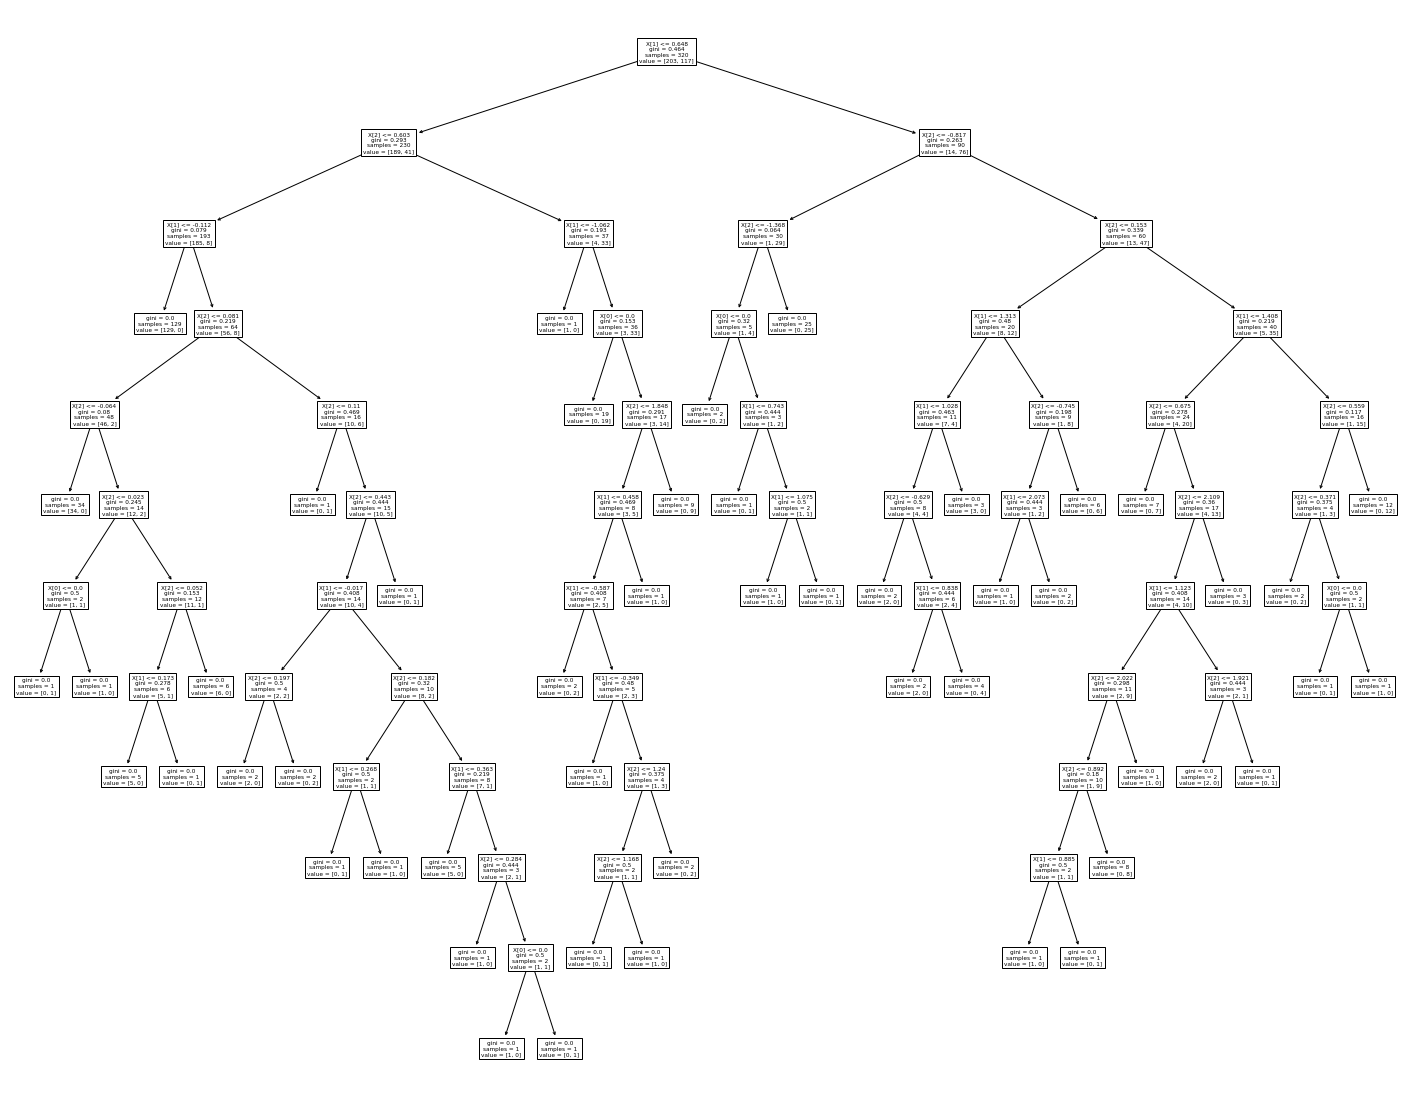

In [46]:
fig = plt.figure(figsize=(25,20))
ax = tree.plot_tree(dt)


<a id='cross_validation'></a>

***
## Cross Validation
***

- The above Decision Tree Classifier gives lowe score with test data in comparison with training data.

- The model is trying to learn complex patterns in training data with great detail, such that it is unable to generalize well on new data.

- To balance this over-fitting, we need to tune the model in such a way, the information gain will be high and the model will able to learn necessary patterns and generalize well on new data.

- We will find the best value for max_depth with cross validation technique.

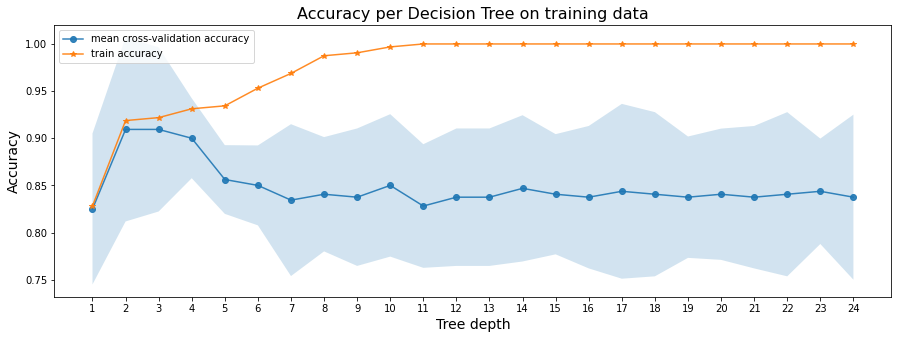

In [47]:

def run_cross_validation(X,y, tree_depths, cv=5, scoring='accuracy'):
    """Cross Validation function that returns, mean cross validation score, standard deviation cross validation score\
        and accuracy score"""

    cv_score_list = []
    cv_score_std = []
    cv_score_mean = []
    accuracy_score= []

    for depth in tree_depths:
        tree_model = tree.DecisionTreeClassifier(max_depth=depth)
        cv_score = model_selection.cross_val_score(tree_model, X,y, cv=cv, scoring=scoring)

        cv_score_list.append(cv_score)
        cv_score_mean.append(cv_score.mean())
        cv_score_std.append(cv_score.std())
        accuracy_score.append(tree_model.fit(X,y).score(X,y))
    
    cv_score_mean = np.array(cv_score_mean)
    cv_score_std = np.array(cv_score_std)
    accuracy_score = np.array(accuracy_score)

    return cv_score_mean, cv_score_std, accuracy_score


def plot_cross_validation(depths, cv_score_mean, cv_score_std, accuracy_score, title):
    """Function to plot cross validation score"""

    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_score_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_score_mean-2*cv_score_std, cv_score_mean+2*cv_score_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_score, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# define a range of tree depth
tree_depth = range(1,25)

# apply cross validation to training data
mean_cv_score, std_cv_score, accuracy_score = run_cross_validation(X_train, y_train, tree_depths=tree_depth)


# plot the result of cross validation
plot_cross_validation(tree_depth, mean_cv_score, std_cv_score, accuracy_score, "Accuracy per Decision Tree on training data")

In [48]:
# Find Best fit

idx_max = mean_cv_score.argmax()
best_depth = tree_depth[idx_max]

best_cv_score = mean_cv_score[idx_max]
best_std_cv_score = std_cv_score[idx_max]

print('With max depth of {} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'\
    .format(best_depth, round(best_cv_score*100,5), round(best_std_cv_score*100, 5)))


With max depth of 2 tree achieves the best mean cross-validation accuracy 90.9375 +/- 4.88141% on training dataset


<a id="final_model"></a>

***
## Final Decision Tree Model
***

In [54]:
# Again train the model with best depth
dt_tuned = tree.DecisionTreeClassifier(max_depth=best_depth).fit(X_train, y_train)

print("Test score: {:.2f}".format(dt_tuned.score(X_test,y_test)))
print("Train score: {:.2f}".format(dt_tuned.score(X_train, y_train)))

Test score: 0.91
Train score: 0.92


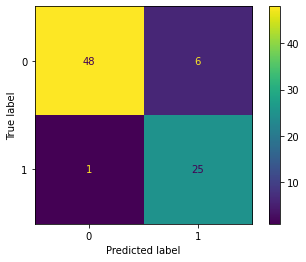

In [55]:
# confusion matrix
new_pred = dt_tuned.predict(X_test)

metrics.plot_confusion_matrix(dt_tuned, X_test, y_test);

The score has improved and true positive predictions as well.

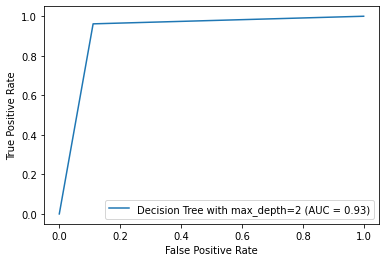

In [51]:
# Roc Curve

fpr,tpr, threshold = metrics.roc_curve(y_test, new_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Decision Tree with max_depth={}".format(best_depth))
display.plot()
plt.show()

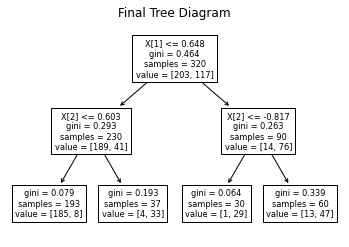

In [52]:
tree.plot_tree(dt_tuned)
plt.title("Final Tree Diagram")
plt.show()

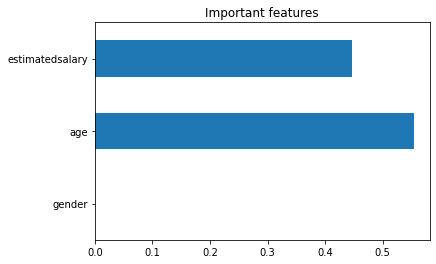

In [53]:
# feature importance

feature_score = pd.Series(dt_tuned.feature_importances_, index=X.columns.tolist())

feature_score.plot(kind='barh')
plt.title('Important features')
plt.show()

<a id='conclusion'></a>

***
## Conclusion:
***
- Statistical analysis significantly tells that female users of older age group and male users of young age group are likely to have frequent purchasing activity.

- The tuned decision model with max depth 2, model accuracy has increased and false predictions rate has been decreased.

- Our assumption that age is the primary feature is verified by the Decision Tree algorithm.

- As the data depicts the male:female ratio and their respective age and estimated salary, if this is the actual proportion in a population without any sampling bias or any other error, then the information derived from [EDA](#statistical-and-analytical-insights-from-the-dataset) will help to pose customized ads and the [decision tree](#final-decision-tree-model) will help to construct a predictive machine learning pipeline.

[Navigate to top](#contents)